In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('output_data/melted.csv', index_col=0)

In [58]:
df.pageviews = pd.to_numeric(df.pageviews)

# EDA

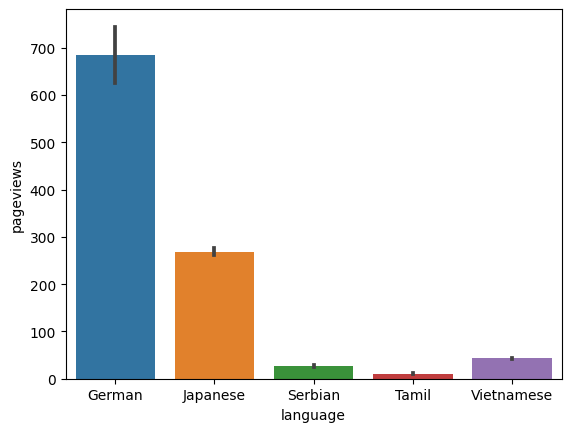

In [59]:
sns.barplot(x="language", y="pageviews", data=df)
plt.show()

# Stay Home Requirements

Only look at the stay_home_requirements and after_lockdown_start for now.

In [60]:
df_cleaned = pd.read_csv('output_data/cleaned.csv')

In [61]:
df_cleaned = df_cleaned.dropna(axis=1)
df_cleaned = df_cleaned.set_index(df_cleaned.date).drop(columns="date")
df_cleaned.head()

,Unnamed: 0,language,book,jogging,origami,yoga,bread,orchids,mindfulness,podcast,calligraphy,board games,stay_home_requirements,after_lockdown_start,stringency_index
date,,,,,,,,,,,,,,,
2020-01-01,0,German,159.0,69.0,135.0,718.0,191.0,282.0,0.0,1943.0,133.0,1667.0,0.0,0.0,0.0
2020-01-02,1,German,179.0,79.0,137.0,988.0,251.0,325.0,1.0,2000.0,144.0,1100.0,0.0,0.0,0.0
2020-01-03,2,German,216.0,62.0,152.0,854.0,253.0,338.0,2.0,3709.0,190.0,1036.0,0.0,0.0,0.0
2020-01-04,3,German,234.0,68.0,463.0,908.0,250.0,399.0,2.0,2922.0,179.0,1166.0,0.0,0.0,0.0
2020-01-05,4,German,234.0,79.0,195.0,1019.0,242.0,377.0,1.0,10337.0,169.0,1055.0,0.0,0.0,0.0


Only select the rows where after the first lockdown the stay_home_requirements are not zero, as later values for this column could produce noise.

<AxesSubplot: >

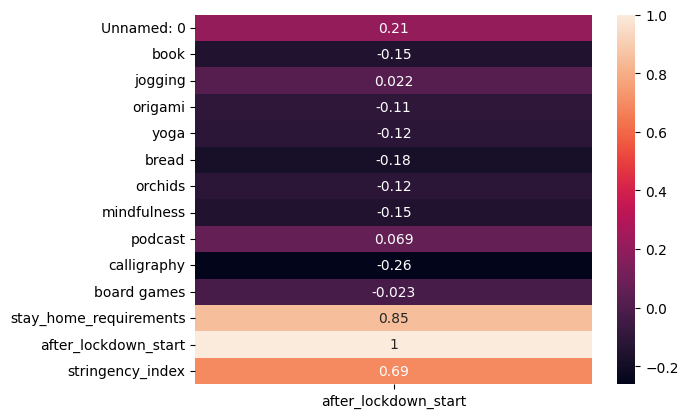

In [62]:
sns.heatmap(df_cleaned[(df_cleaned["after_lockdown_start"] == 0) | (df_cleaned["stay_home_requirements"] > 0)].corr()[['after_lockdown_start']], annot=True)

<AxesSubplot: >

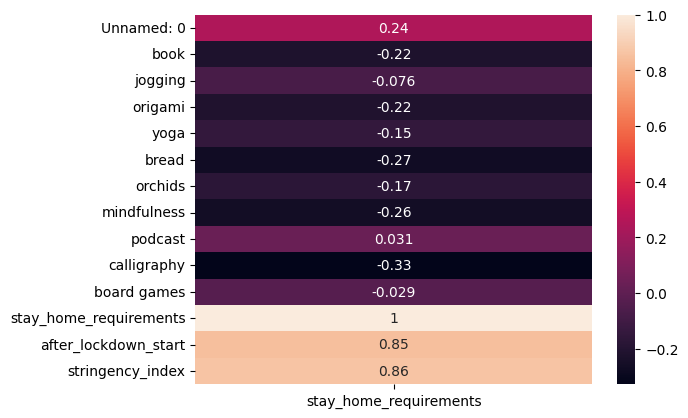

In [63]:
sns.heatmap(df_cleaned[(df_cleaned["after_lockdown_start"] == 0) | (df_cleaned["stay_home_requirements"] > 0)].corr()[['stay_home_requirements']], annot=True)

Correlation with stay_home_requirements.

<AxesSubplot: >

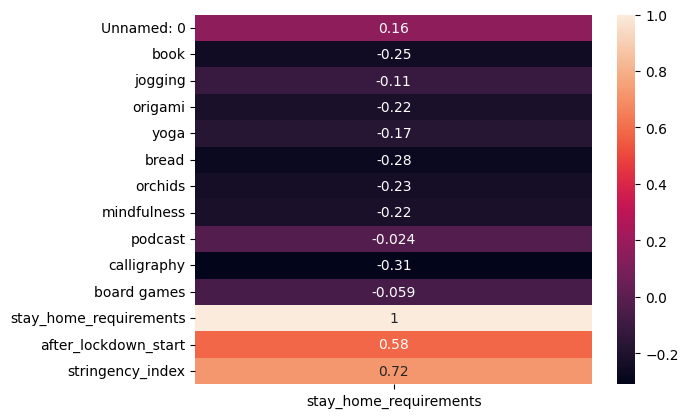

In [64]:
sns.heatmap(df_cleaned.corr()[['stay_home_requirements']], annot=True)

# Stringency Index

<AxesSubplot: >

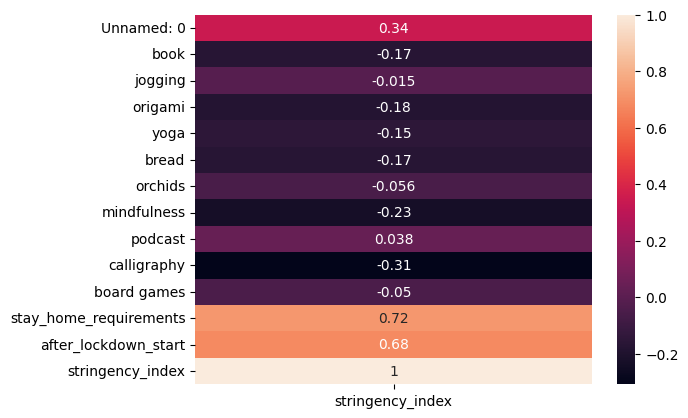

In [65]:
sns.heatmap(df_cleaned[(df_cleaned["after_lockdown_start"] == 0) | (df_cleaned["stringency_index"] > 0)].corr()[['stringency_index']], annot=True)

<AxesSubplot: >

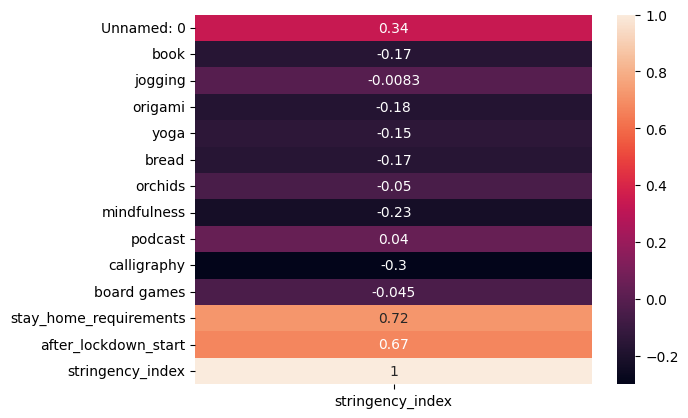

In [66]:
sns.heatmap(df_cleaned.corr()[['stringency_index']], annot=True)

# Weekly views

In [67]:
df_weekly = df.drop(columns=["all_day_bing_tiles_visited_relative_change", "all_day_ratio_single_tile_users", "stay_home_requirements", "after_lockdown_start"])
df_weekly.reset_index(inplace=True)
df_weekly['date'] = pd.to_datetime(df_weekly['date']) - pd.to_timedelta(7, unit='d')
df_weekly.groupby('hobby').resample('W-Mon', on='date').mean().reset_index().sort_values(by='date')

,hobby,date,stringency_index,pageviews
0,board games,2019-12-30,0.000000,292.533333
135,mindfulness,2019-12-30,0.000000,69.466667
189,origami,2019-12-30,0.000000,80.733333
108,jogging,2019-12-30,0.000000,41.966667
216,podcast,2019-12-30,0.000000,873.233333
...,...,...,...,...
80,bread,2020-06-29,50.897667,139.900000
53,book,2020-06-29,50.897667,86.200000
26,board games,2020-06-29,50.897667,136.400000
242,podcast,2020-06-29,50.897667,459.100000


<AxesSubplot: xlabel='date', ylabel='pageviews'>

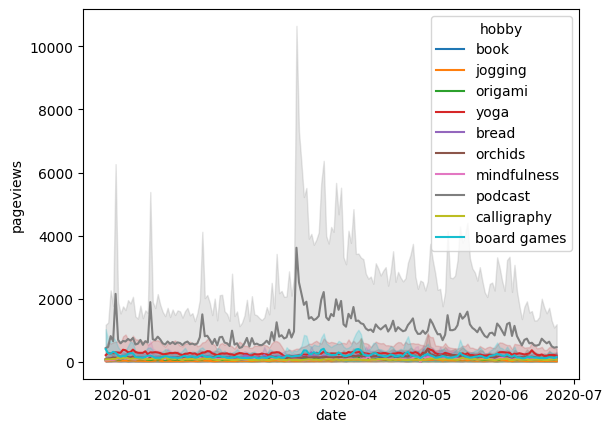

In [68]:
sns.lineplot(df_weekly, x='date', y='pageviews', hue='hobby')

Exclude podcast because of scale.

<AxesSubplot: xlabel='date', ylabel='pageviews'>

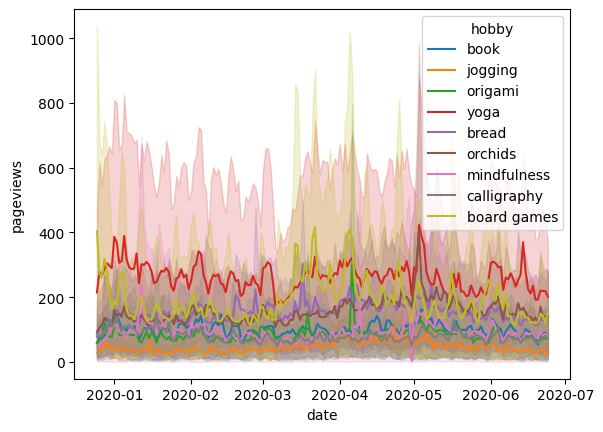

In [69]:
df_weekly_exclude = df_weekly[df_weekly.hobby != 'podcast']
sns.lineplot(df_weekly_exclude, x='date', y='pageviews', hue='hobby')

# Average around stay_home_requirements

In [70]:
df_averaged_stay_home = df.drop(columns=["all_day_bing_tiles_visited_relative_change", "all_day_ratio_single_tile_users", "stringency_index", "after_lockdown_start"])
df_averaged_stay_home.reset_index(inplace=True)
df_averaged_stay_home['date'] = pd.to_datetime(df_averaged_stay_home['date']) - pd.to_timedelta(7, unit='d')
df_averaged_stay_home = df_averaged_stay_home.groupby(['hobby', 'stay_home_requirements']).mean().reset_index()

In [71]:
df_averaged_stay_home

,hobby,stay_home_requirements,pageviews
0,board games,0.0,201.716475
1,board games,1.0,134.966667
2,board games,2.0,280.620968
3,board games,3.0,84.625000
4,book,0.0,117.821839
5,book,1.0,89.126667
6,book,2.0,104.911290
7,book,3.0,12.363636
8,bread,0.0,180.827586
9,bread,1.0,158.833333


<AxesSubplot: xlabel='stay_home_requirements', ylabel='pageviews'>

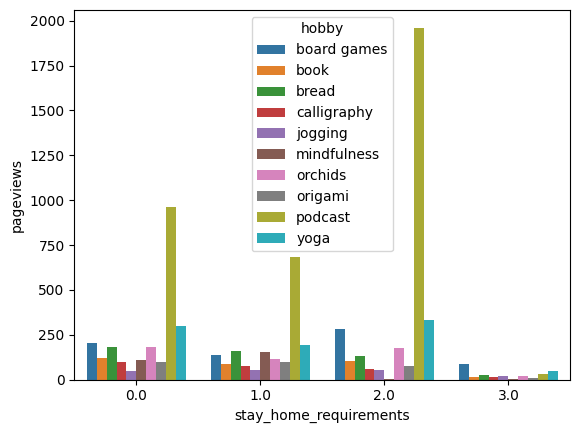

In [72]:
sns.barplot(df_averaged_stay_home, x='stay_home_requirements', y='pageviews', hue='hobby')

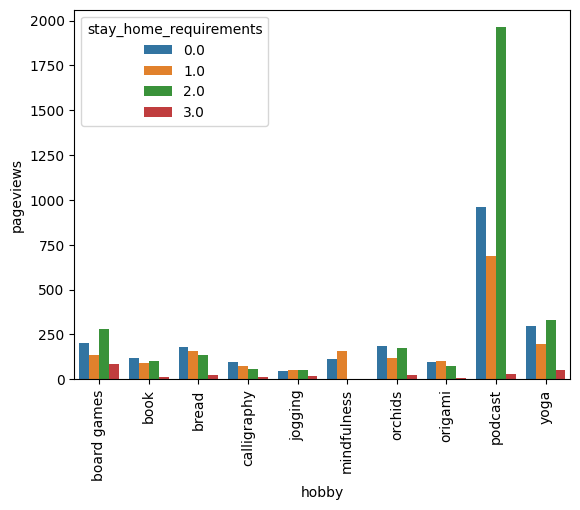

In [80]:
sns.barplot(df_averaged_stay_home, x='hobby', y='pageviews', hue='stay_home_requirements')
_ = plt.xticks(rotation=90)

<AxesSubplot: >

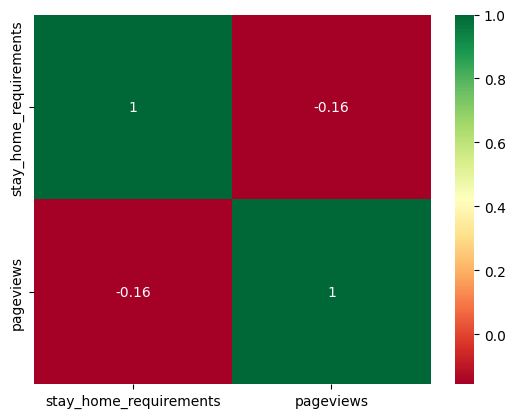

In [74]:
sns.heatmap(df_averaged_stay_home.corr(), annot=True, cmap='RdYlGn')

In [75]:
df[df['stay_home_requirements'] == 3]['language'].unique()

array(['Serbian', 'Tamil'], dtype=object)

See if correlation makes more sense when we exclude stay_home_requirements == 3:

<AxesSubplot: >

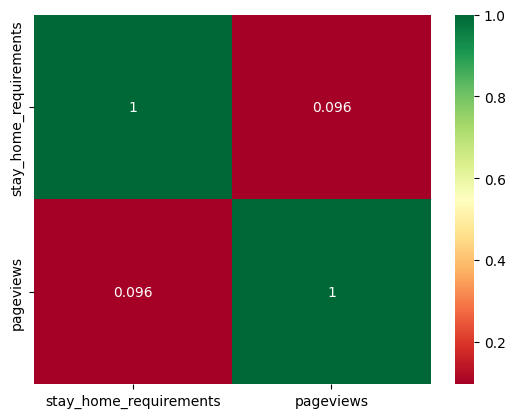

In [76]:
sns.heatmap(df_averaged_stay_home[df_averaged_stay_home['stay_home_requirements'] != 3].corr(), annot=True, cmap='RdYlGn')

Exclude the 0 values after lockdown start

In [77]:
df_after_lockdown_start =  df[(df["after_lockdown_start"] == 0) | (df["stay_home_requirements"] > 0)]

In [78]:
df_after_lockdown_start = df_after_lockdown_start.drop(columns=["all_day_bing_tiles_visited_relative_change", "all_day_ratio_single_tile_users", "stringency_index", "after_lockdown_start"])
df_after_lockdown_start.reset_index(inplace=True)
df_after_lockdown_start['date'] = pd.to_datetime(df_after_lockdown_start['date']) - pd.to_timedelta(7, unit='d')
df_after_lockdown_start = df_after_lockdown_start.groupby(['hobby', 'stay_home_requirements']).mean().reset_index()

<AxesSubplot: >

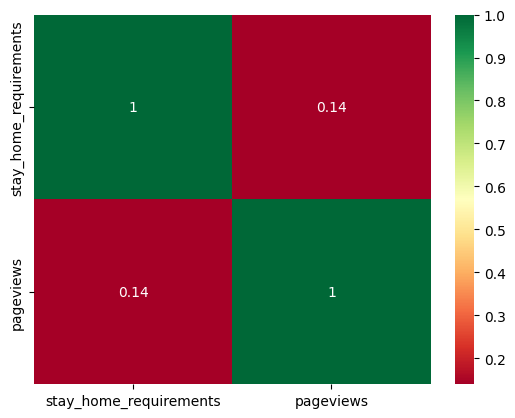

In [79]:
sns.heatmap(df_after_lockdown_start[df_after_lockdown_start['stay_home_requirements'] != 3].corr(), annot=True, cmap='RdYlGn')